<a href="https://colab.research.google.com/github/foreverpro700/foreverpro700/blob/main/Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cáculo:

*   Primeiro se observa os retornos de uma ação X e uma ação Y.
*   Realiza-se o cálculo da média aritmética dos retornos (periódo específico)
*   Calcula-se o desvio padrão de cada um dos ativos (volatilidade)
*   Calcula-se a covariancia entre os dois ativos

> Como funciona?

  Utiliza da teoria moderna do portifólio de Markowitz na década de 1950, para que o usuário possa otimizar ao máximo a relação entre risco e retorno sobre os investimentos.

Objetivo:

    Calcular o peso ideal das ações de um portifólio no mercado brasileiro (B3)

In [39]:
#Instalar e importar funções
!pip install yfinance
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.optimize import minimize

In [40]:
# Definição do período de tempo
inicio = dt.date(2015, 1, 1)
final = dt.date(2022, 12, 31)

In [41]:
# Lista de ações
lista_acoes = ["WEGE3", "LREN3", "VALE3", "PETR4", "EQTL3", "EGIE3"]

#Função para que não precise colocar ".SA"
lista_acoes = [acao + ".SA" for acao in lista_acoes]

# Obtenção dos preços das ações
precos = yf.download(lista_acoes, start=inicio, end=final)['Adj Close']

display(precos)

[*********************100%%**********************]  6 of 6 completed


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,
2015-01-02,14.928640,4.597057,10.549940,3.318810,12.725252,5.088043
2015-01-05,14.946950,4.421531,10.256654,3.035151,12.533895,5.122736
2015-01-06,15.249092,4.670609,10.374802,2.935870,13.036208,5.046747
2015-01-07,15.633644,4.630489,10.551327,3.074155,13.514600,4.988926
2015-01-08,15.793865,4.597057,10.563839,3.272715,13.658118,5.073178
...,...,...,...,...,...,...
2022-12-23,35.706520,26.624327,21.175211,20.212734,81.991486,37.959824
2022-12-26,35.397167,25.972786,20.042898,20.067896,82.741867,37.654167
2022-12-27,35.209686,26.032019,19.723526,20.204685,84.717575,37.476700


In [42]:
# Cálculo dos retornos logarítmicos
retornos = precos.pct_change().apply(lambda x: np.log(1+x)).dropna()
media_retornos = retornos.mean()
matriz_cov = retornos.cov()

In [43]:
# Função para definir o perfil de risco do investidor
def definir_perfil_investidor(perfil):
    if perfil == 'conservador':
        return np.array([0.7, 0.1, 0.1, 0.05, 0.025, 0.025])
    elif perfil == 'balanceado':
        return np.array([0.3, 0.25, 0.2, 0.15, 0.05, 0.05])
    elif perfil == 'agressivo':
        return np.array([0.1, 0.2, 0.3, 0.25, 0.1, 0.05])
    else:
        raise ValueError("Perfil não reconhecido")

# Função para pedir ao usuário para inserir o perfil de investidor
def solicitar_perfil_usuario():
    perfil = input("Por favor, insira seu perfil de investidor (conservador, balanceado, agressivo): ")
    return definir_perfil_investidor(perfil)

# Mostra o perfil escolhido
perfil_risco = solicitar_perfil_usuario()
print("Perfil de risco:", perfil_risco)


In [44]:
# Simulação de carteiras
numero_carteiras = 100000
tabela_retornos_esperados = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas = np.zeros(numero_carteiras)
tabela_sharpe = np.zeros(numero_carteiras)
tabela_pesos = np.zeros((numero_carteiras, len(lista_acoes)))

for k in range(numero_carteiras):
    pesos = np.random.random(len(lista_acoes))
    pesos /= np.sum(pesos)
    tabela_pesos[k, :] = pesos

    retorno_esperado = np.sum(media_retornos * pesos) * 252
    volatilidade_esperada = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov * 252, pesos)))

    tabela_retornos_esperados[k] = retorno_esperado
    tabela_volatilidades_esperadas[k] = volatilidade_esperada
    tabela_sharpe[k] = retorno_esperado / volatilidade_esperada

In [45]:
# Mostra as simulações dos pesos ideias de cada carteira
indice_do_sharpe_maximo = tabela_sharpe.argmax()
pesos_otimizados = tabela_pesos[indice_do_sharpe_maximo]
display(tabela_pesos)

array([[0.24494922, 0.23918882, 0.05404671, 0.22509311, 0.07232889,
        0.16439325],
       [0.09891742, 0.15310054, 0.16933812, 0.31382602, 0.10565275,
        0.15916516],
       [0.23894028, 0.19615565, 0.32180754, 0.08752984, 0.05328142,
        0.10228527],
       ...,
       [0.07272445, 0.02220626, 0.04522265, 0.28602804, 0.26904369,
        0.3047749 ],
       [0.17694617, 0.04791454, 0.33861679, 0.31479972, 0.10517151,
        0.01655127],
       [0.15589534, 0.25265867, 0.2438211 , 0.16998823, 0.17469531,
        0.00294136]])

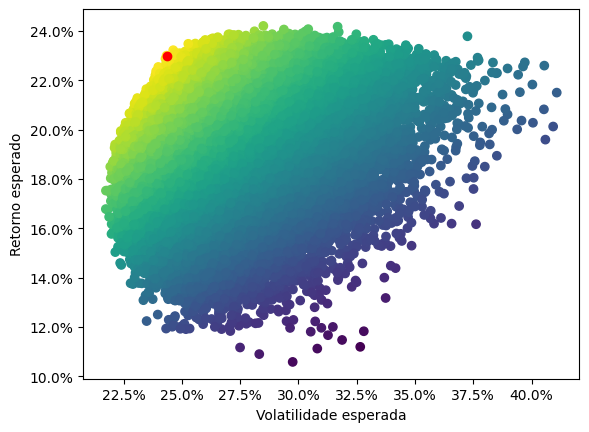

In [46]:
# Plotagem dos resultados
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas, tabela_retornos_esperados, c=tabela_sharpe)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
ax.scatter(tabela_volatilidades_esperadas[indice_do_sharpe_maximo],
            tabela_retornos_esperados[indice_do_sharpe_maximo], c="red")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()